In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [2]:
from sklearn.svm import SVC

In [4]:
from latentfeatureextractor import PhysioAutoencoder
ae = PhysioAutoencoder ()

## Chest and Wrist Physio modalities classification

In [12]:
# use chest and wrist features for classification
scores_all = []
cms = []
for sid in ae.subject_ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso_" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso_" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,:-1]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,:-1]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = SVC(C = 0.8, gamma= 'auto', kernel='poly', degree=3)
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_all.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.8503064592173503
f1 score:  0.8523468124955119

subject  3
accuracy:  0.814595660749507
f1 score:  0.8126075627785327

subject  4
accuracy:  0.8280600461893765
f1 score:  0.754988007196424

subject  5
accuracy:  0.9472259810554804
f1 score:  0.9461690500646014

subject  6
accuracy:  0.8982742960944596
f1 score:  0.899448678787097

subject  7
accuracy:  0.8292766151046406
f1 score:  0.7570052715385162

subject  8
accuracy:  0.6576117713638936
f1 score:  0.6501508481611177

subject  9
accuracy:  0.9662039144287665
f1 score:  0.965742841857657

subject  10
accuracy:  0.8028107158541942
f1 score:  0.7474852920058669

subject  11
accuracy:  0.8995397912223594
f1 score:  0.8990567782524833

subject  13
accuracy:  0.8756738544474394
f1 score:  0.851341286672777

subject  14
accuracy:  0.7814324202963628
f1 score:  0.7601131970260562

subject  15
accuracy:  0.8322884012539185
f1 score:  0.7738358073776004

subject  16
accuracy:  0.9989869428185502
f1 score:  0.998986667

In [13]:
np.array(scores_all)[:,1].mean() #accuracy

0.8352207063954066

In [14]:
np.array(scores_all)[:,1].std()

0.1113977594858414

In [15]:
np.array(scores_all)[:,2].mean() #f1-score

0.8112379600762781

In [16]:
np.array(scores_all)[:,2].std()

0.12478332795554012

### Confusion Matrices per subject and for all subjects combined

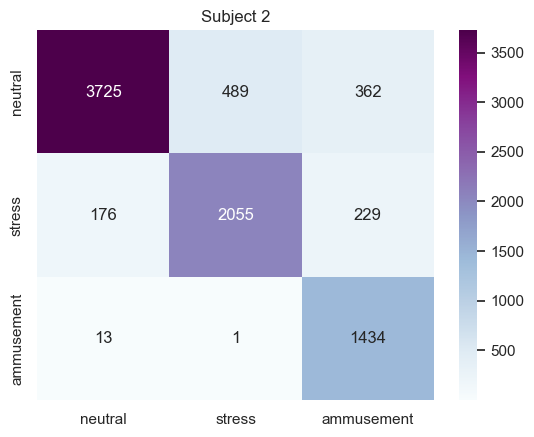

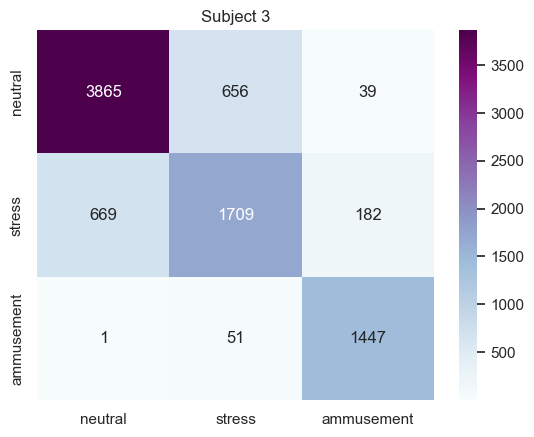

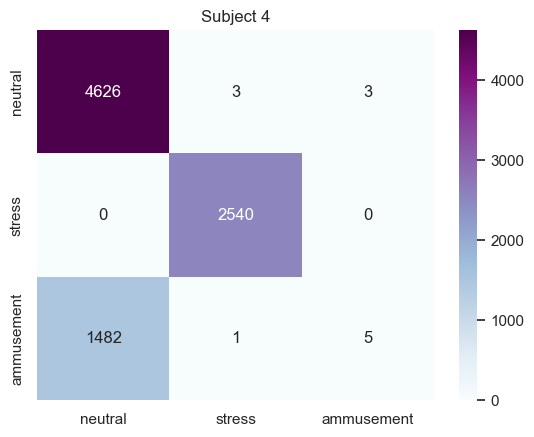

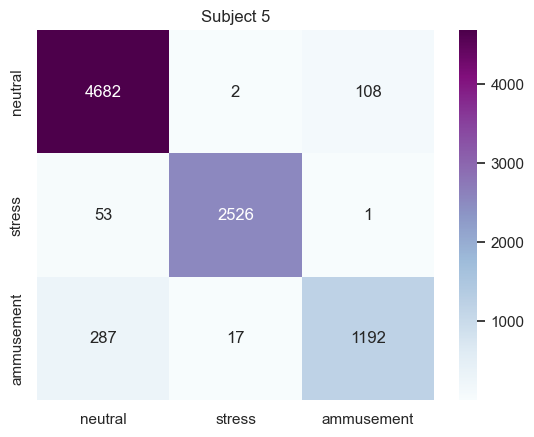

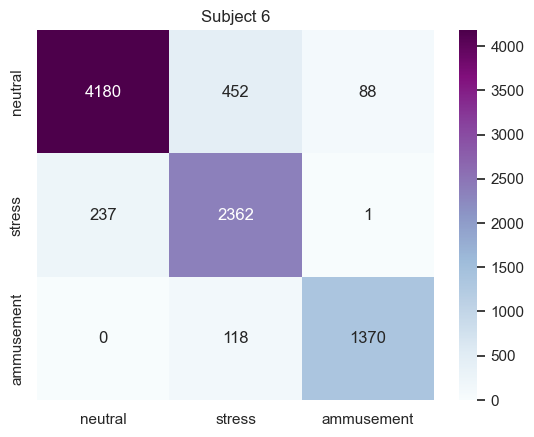

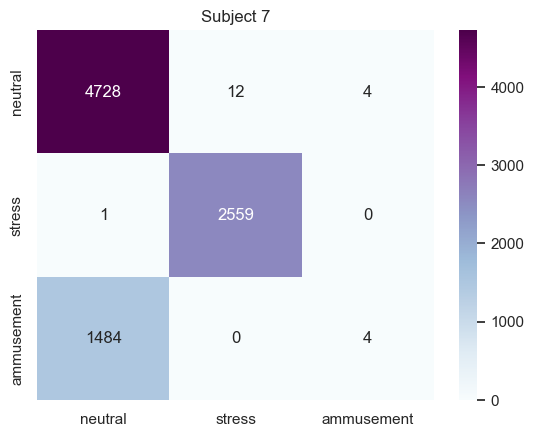

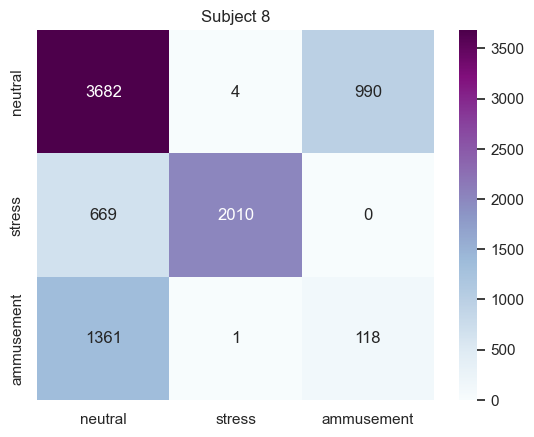

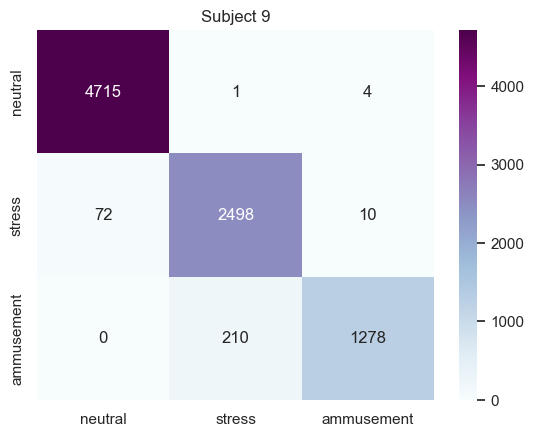

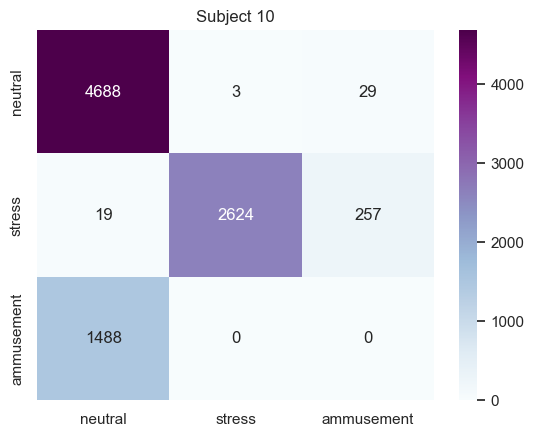

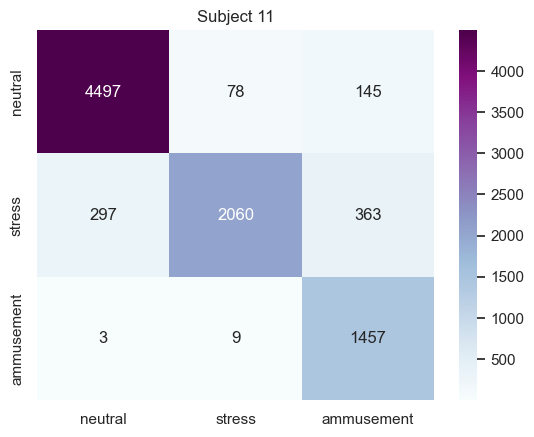

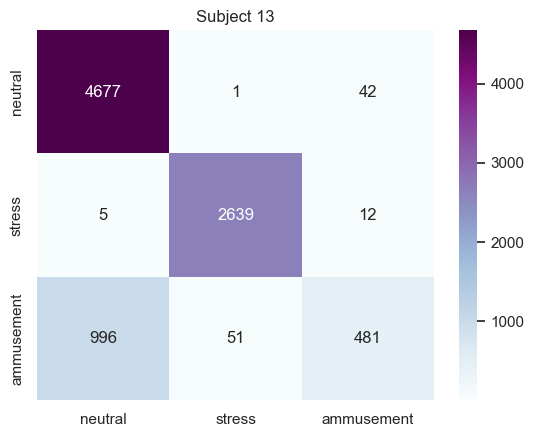

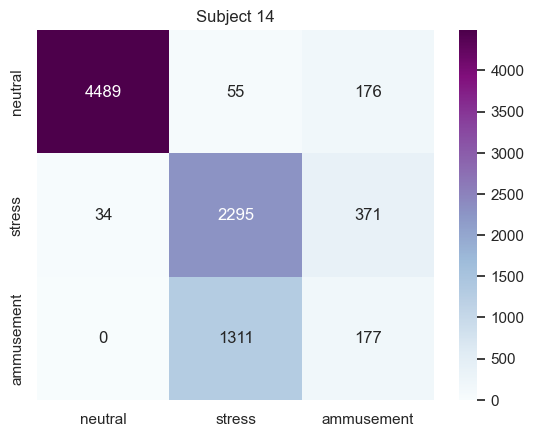

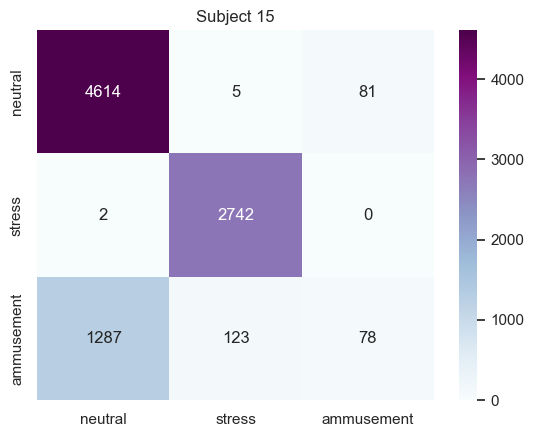

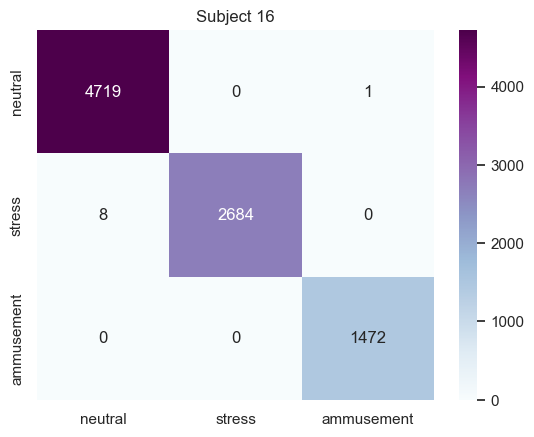

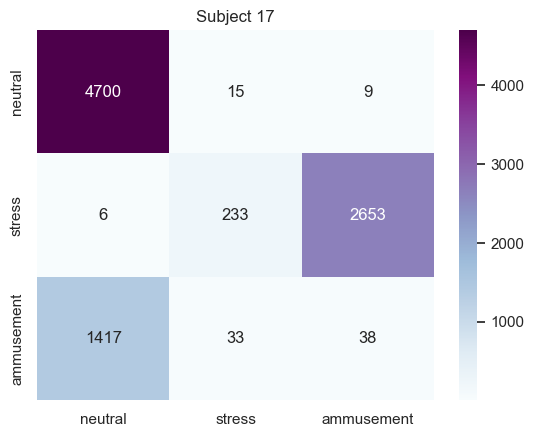

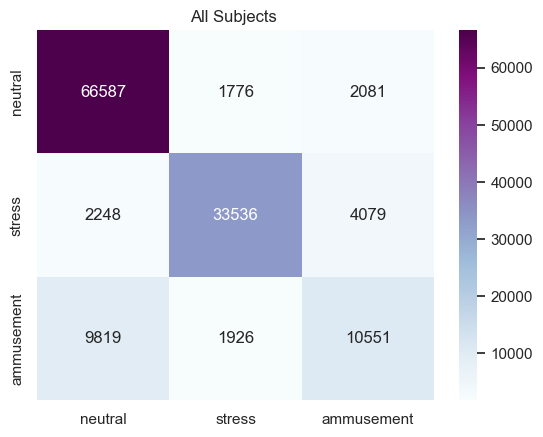

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_all)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()


## Chest only physio modalities classification

In [21]:
# use chest only features for classification
scores_c = []
cms = []

for sid in ae.subject_ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso_" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso_" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,:80]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,:80]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = SVC(C = 0.8, gamma= 'auto', kernel='poly', degree=3)
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_c.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.7115747289014616
f1 score:  0.710227619971172

subject  3
accuracy:  0.7244459914143172
f1 score:  0.7229919757364227

subject  4
accuracy:  0.8241339491916859
f1 score:  0.7527863178897953

subject  5
accuracy:  0.8883626522327469
f1 score:  0.8836231974668762

subject  6
accuracy:  0.8124432334241598
f1 score:  0.8021607502920685

subject  7
accuracy:  0.8276842584167425
f1 score:  0.7563398353845773

subject  8
accuracy:  0.5046972269383135
f1 score:  0.5214498682464118

subject  9
accuracy:  0.8165680473372781
f1 score:  0.7836945568114312

subject  10
accuracy:  0.8101668862538428
f1 score:  0.7558173844528695

subject  11
accuracy:  0.9559995510158267
f1 score:  0.95616484218488

subject  13
accuracy:  0.8404088050314465
f1 score:  0.8010179490802796

subject  14
accuracy:  0.7412438257745847
f1 score:  0.739964515763358

subject  15
accuracy:  0.8336318853560233
f1 score:  0.7659002553594283

subject  16
accuracy:  0.9769248086447546
f1 score:  0.97655088

In [22]:
np.array(scores_c)[:,1].mean() #accuracy

0.8068429582439347

In [23]:
np.array(scores_c)[:,1].std()

0.10731676365825515

In [24]:
np.array(scores_c)[:,2].mean() #f1-score

0.7796896633319368

In [25]:
np.array(scores_c)[:,2].std()

0.1033377362766242

### Confusion Matrices per subject and for all subjects combined

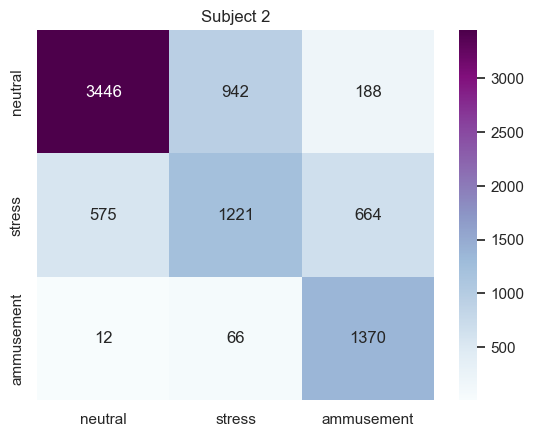

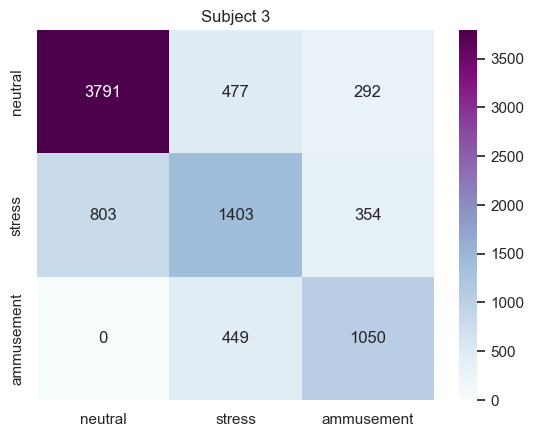

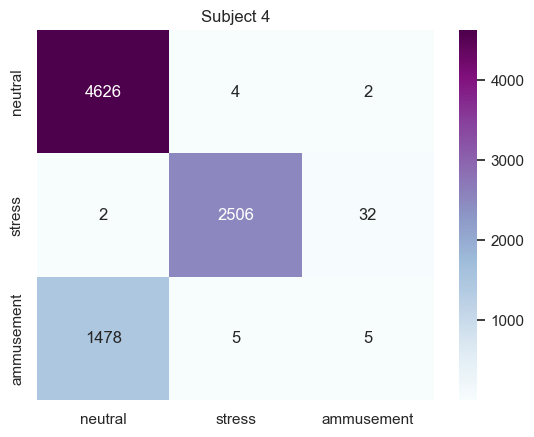

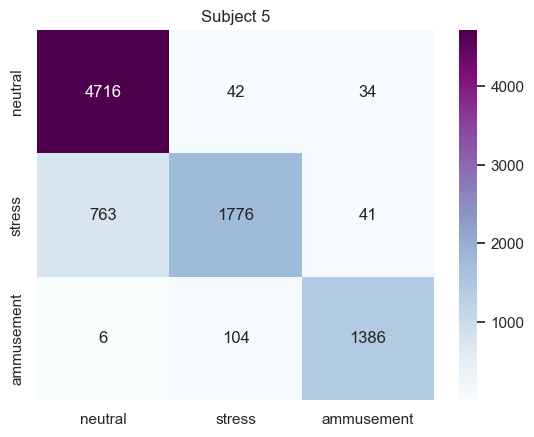

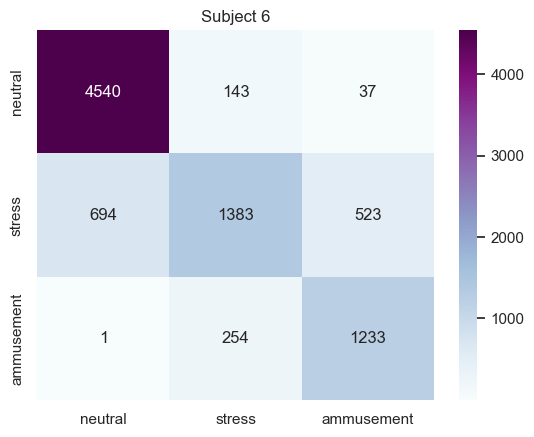

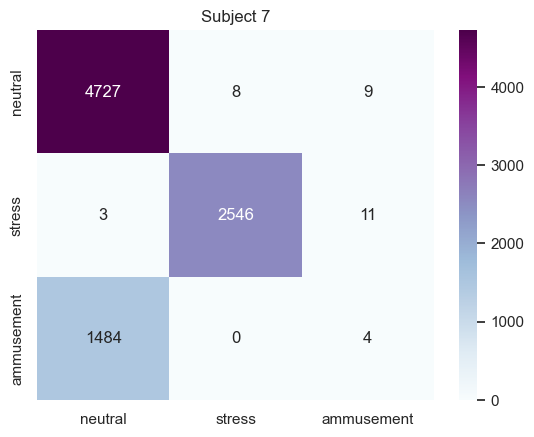

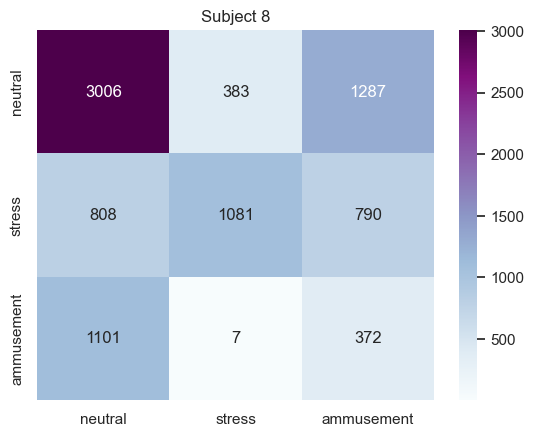

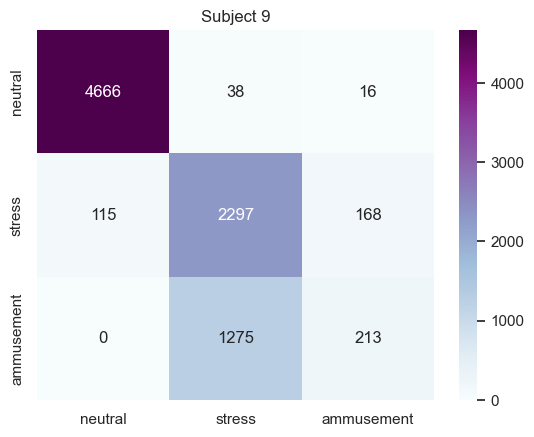

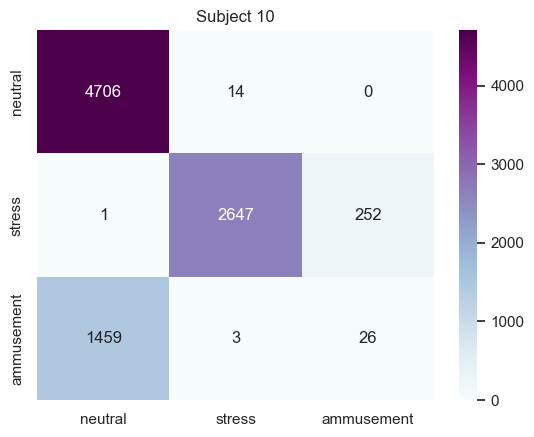

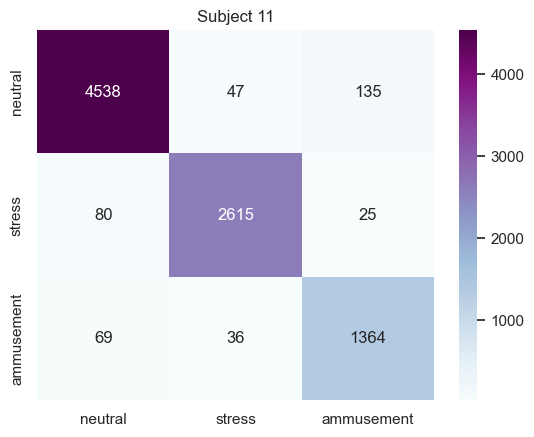

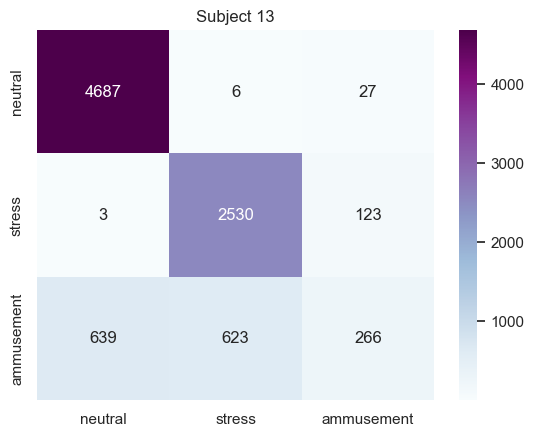

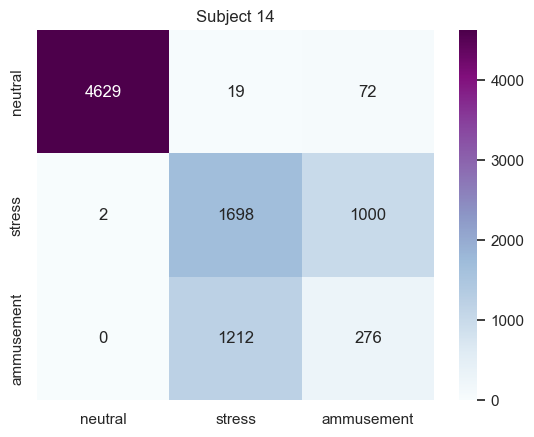

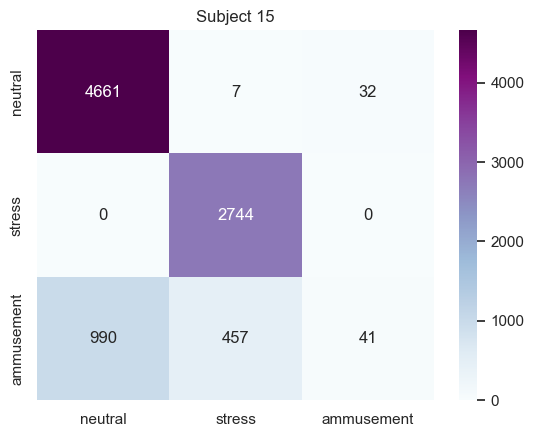

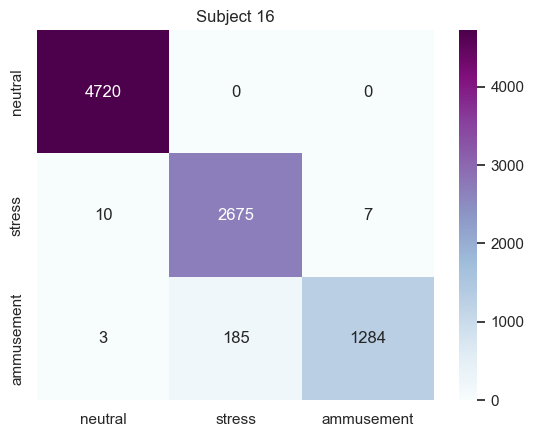

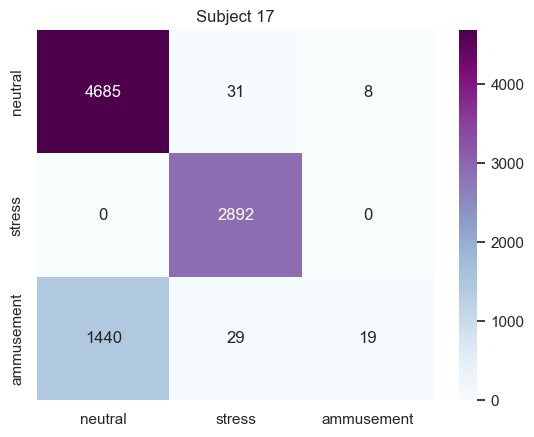

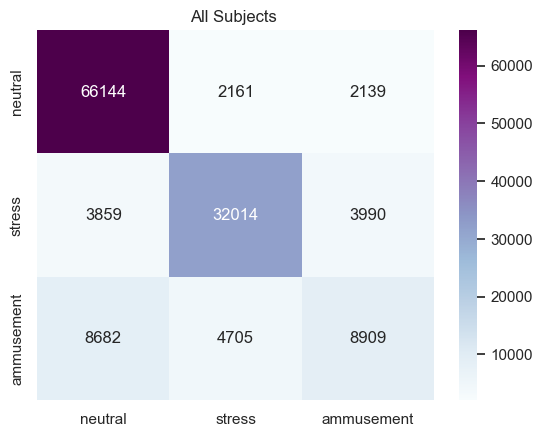

In [26]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_c)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Wrist only physio modalities classification

In [29]:
# use wrist only features for classification
scores_w = []
cms = []

for sid in ae.subject_ids:
    feat = np.array(pd.read_pickle ("features/train/feat_loso_" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("features/test/feat_loso_" + str(sid) + ".pkl"))
    
    y = feat[:,-1]
    x = feat[:,80:-1]
    x = StandardScaler().fit_transform(x)
    
    y_test = feat_test[:,-1]
    x_test = feat_test[:,80:-1]
    x_test = StandardScaler().fit_transform(x_test)
    
    clf = SVC()
    clf.fit(x, y)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print("subject ", sid)
    print("accuracy: ", acc)
    print("f1 score: ", f1)
    print("")

    scores_w.append([sid, acc, f1])
    cms.append(cm)

subject  2
accuracy:  0.8124705327675624
f1 score:  0.782415012835721

subject  3
accuracy:  0.7169045132846038
f1 score:  0.7136062473473096

subject  4
accuracy:  0.8271362586605081
f1 score:  0.7539241979392367

subject  5
accuracy:  0.8351375732972486
f1 score:  0.7825820900569809

subject  6
accuracy:  0.8795413260672116
f1 score:  0.8814128892054088

subject  7
accuracy:  0.7735441310282075
f1 score:  0.7120321472437652

subject  8
accuracy:  0.8191284663271081
f1 score:  0.7480369766175216

subject  9
accuracy:  0.9846381429221666
f1 score:  0.9845736576961767

subject  10
accuracy:  0.6498682476943346
f1 score:  0.6547205629638648

subject  11
accuracy:  0.6525984959030194
f1 score:  0.6345836795078477

subject  13
accuracy:  0.8116576819407008
f1 score:  0.7394698767342123

subject  14
accuracy:  0.6762460709474629
f1 score:  0.6145208878095363

subject  15
accuracy:  0.5975145544111061
f1 score:  0.6112805476972166

subject  16
accuracy:  0.7817424583520937
f1 score:  0.78087

In [30]:
np.array(scores_w)[:,1].mean() #accuracy

0.7501262554306148

In [31]:
np.array(scores_w)[:,1].std()

0.1286814144197597

In [32]:
np.array(scores_w)[:,1].mean() #f1-score

0.7501262554306148

In [33]:
np.array(scores_w)[:,1].std()

0.1286814144197597

### Confusion Matrices per subject and for all subjects combined

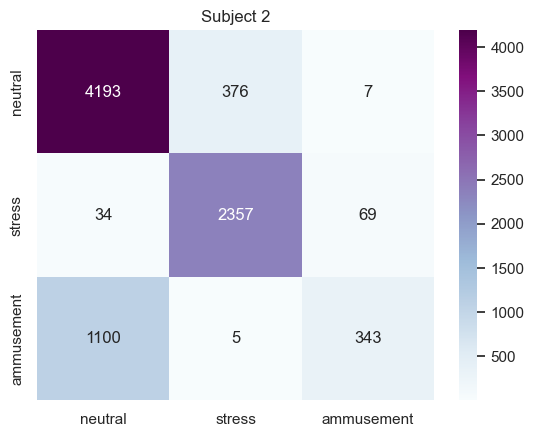

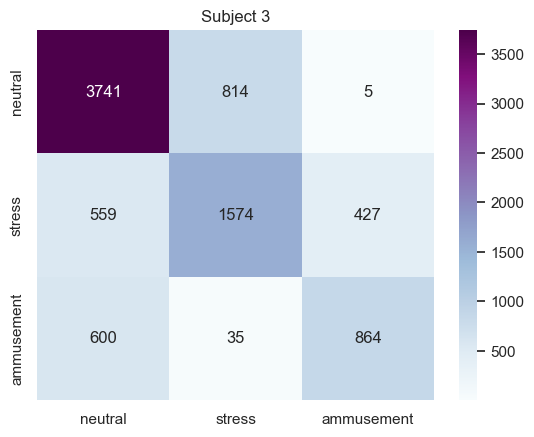

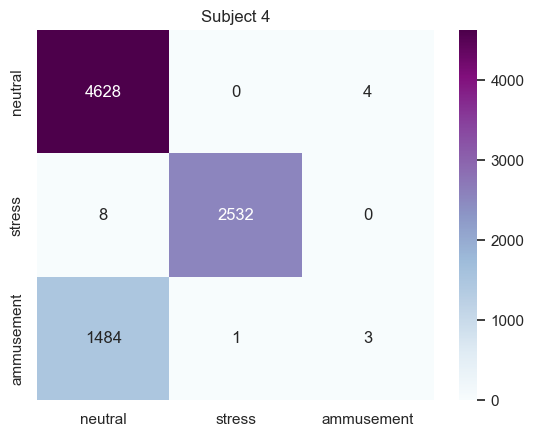

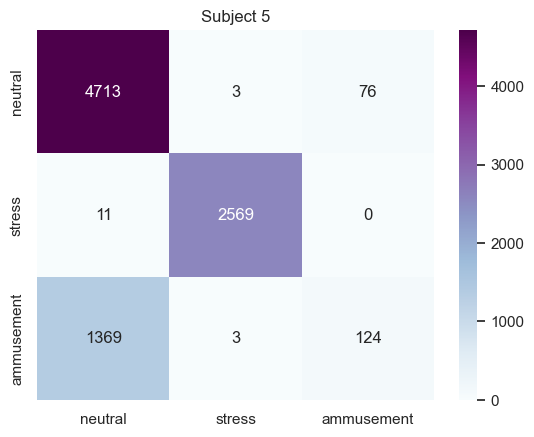

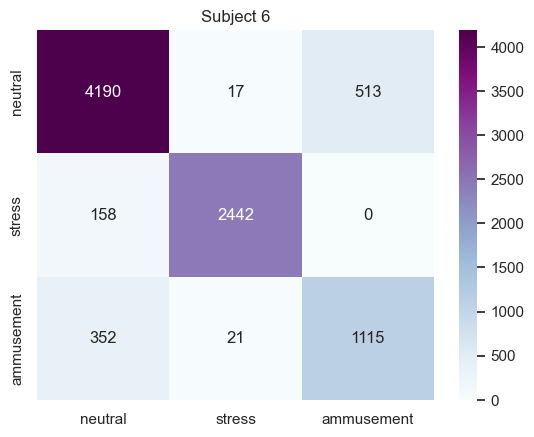

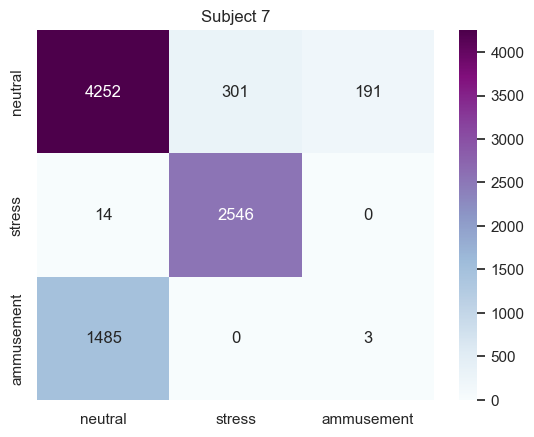

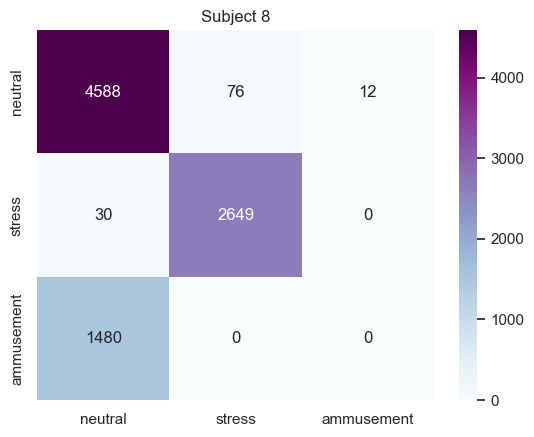

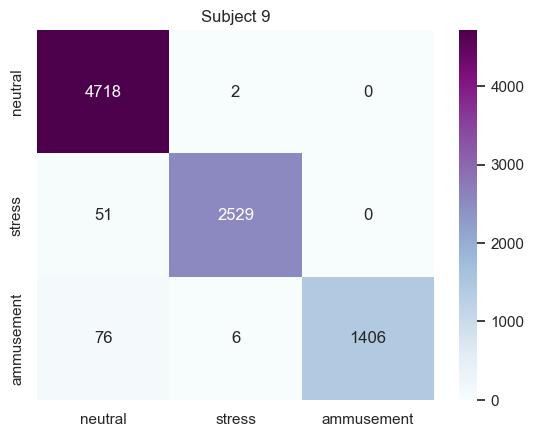

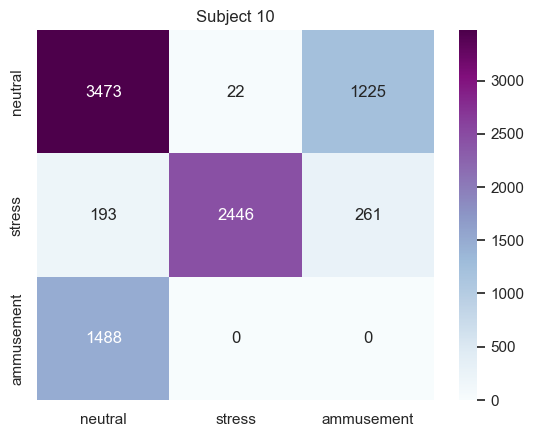

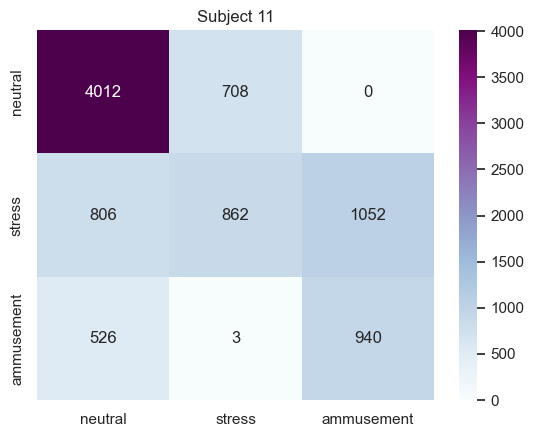

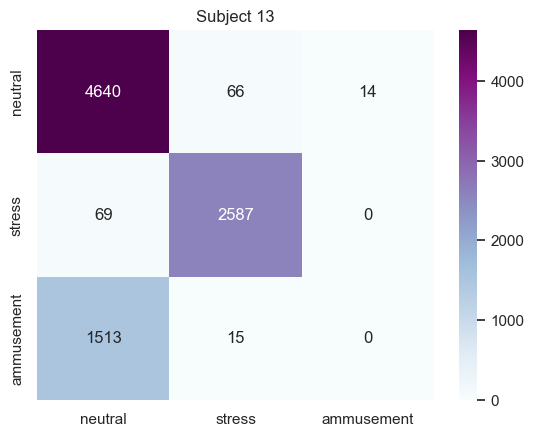

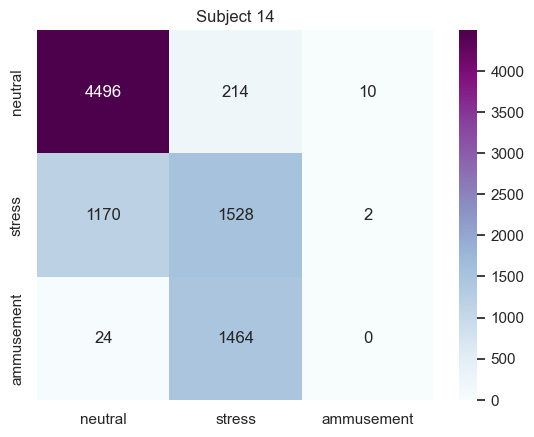

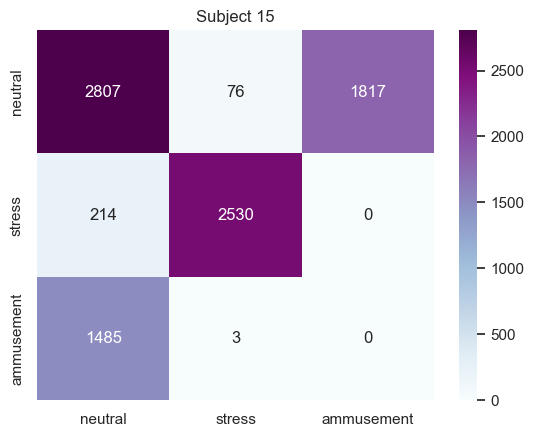

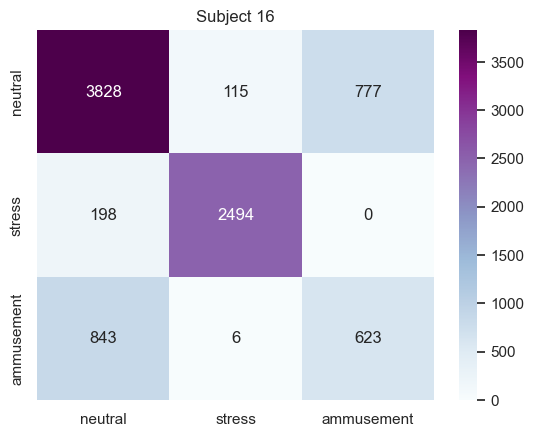

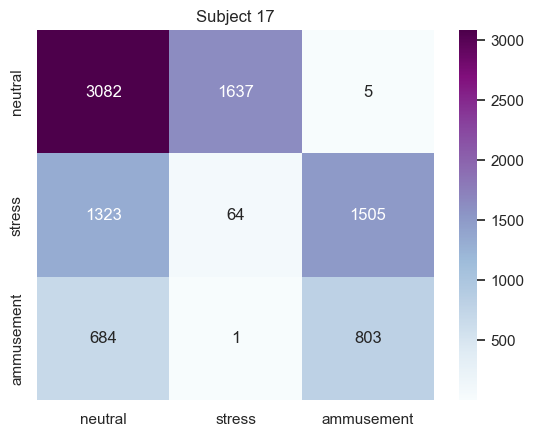

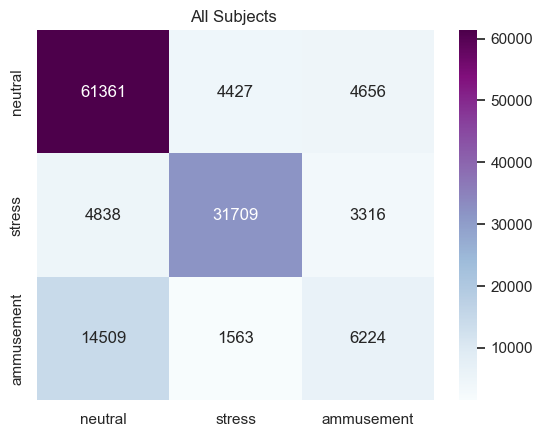

In [35]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_w)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()
    
df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Accuracies plot

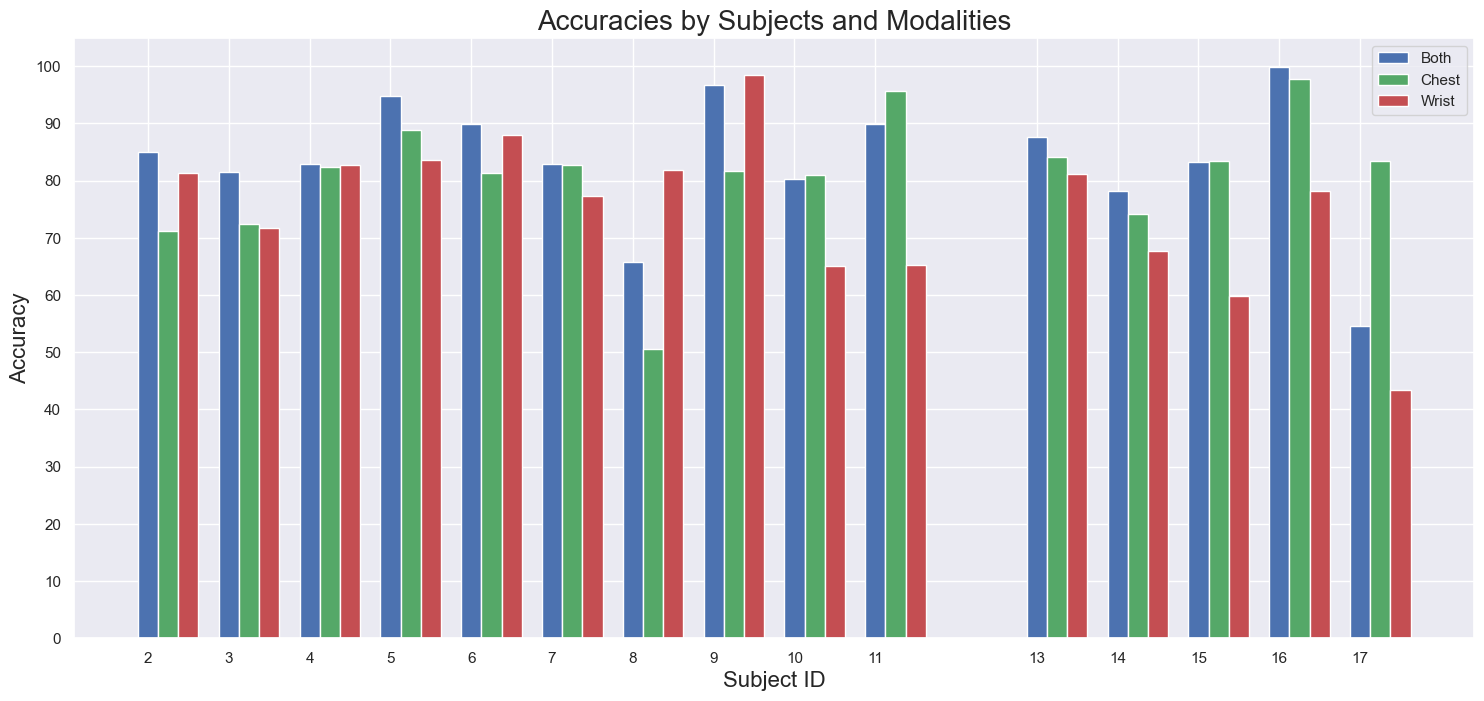

In [36]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("Accuracies by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,1]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,1]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,1]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])


## F1-score plot

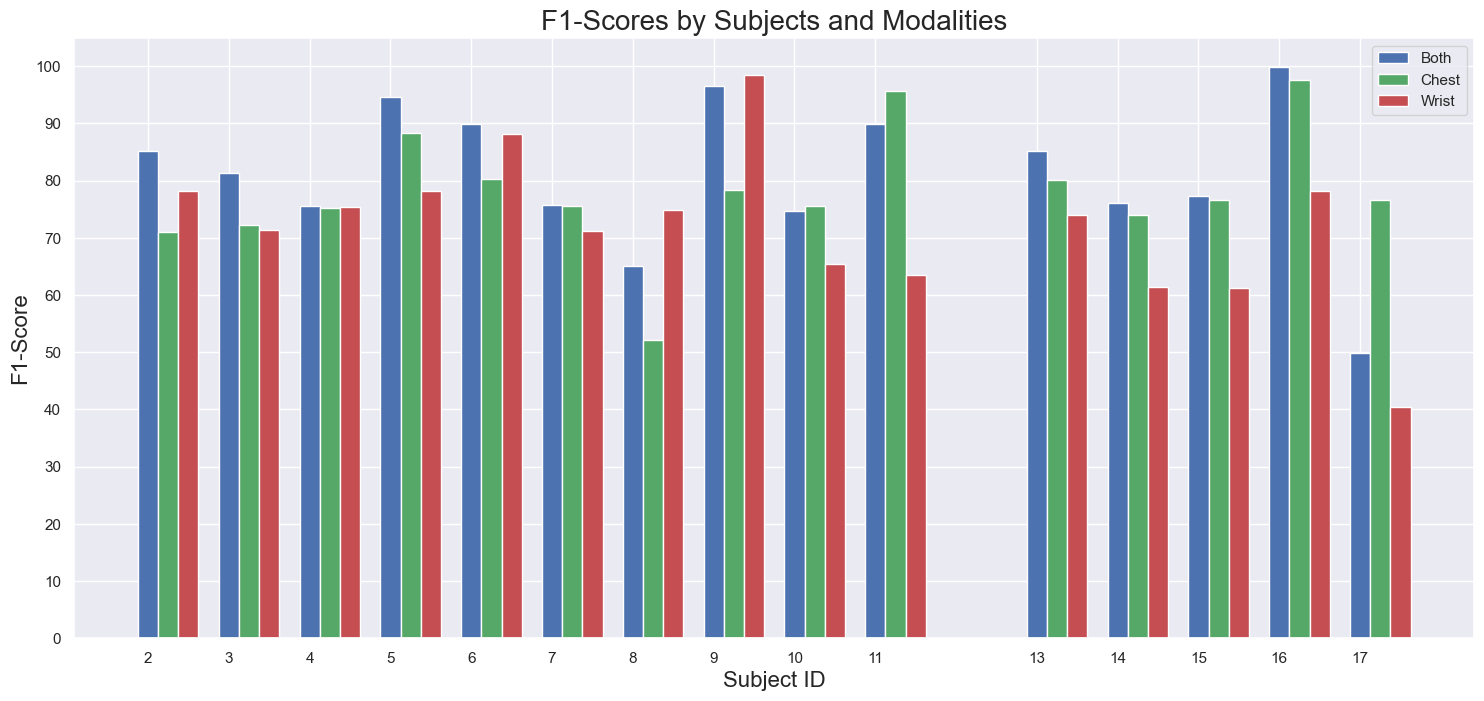

In [37]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('F1-Score', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("F1-Scores by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,2]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,2]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,2]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])